# Берём тексты

In [ ]:
import json
import re
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict, OrderedDict
import glob
import sys

In [ ]:
with open('drive/MyDrive/Coursework2021/english_corpus.txt', 'r') as f:
    documents = f.readlines()
documents = list(map(lambda doc: doc.rstrip('\n'), documents))

In [ ]:
print('суммарная длинна текстов', sum(map(lambda doc: len(re.split('\s+', doc)), documents)))

суммарная длинна текстов 234401541


In [ ]:
documents[22][-100:]

'n with little space for domestic pleasure and home comfort know -PRON- child more PERSON1 sister be '

Всего текстов 11008


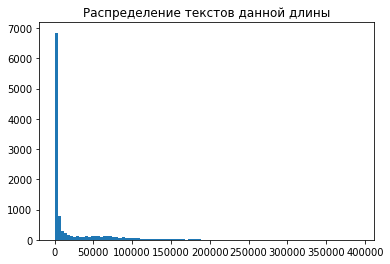

In [ ]:
doc_sizes = list(map(lambda doc: len(re.split('\s+', doc)), documents))
doc_sizes = [sz for sz in doc_sizes if sz < 10000000]
plt.hist(doc_sizes, bins=100)
plt.title('Распределение текстов данной длины')
print(f'Всего текстов {len(documents)}')

In [ ]:
print('*0-е квантили размеров:', np.quantile(np.array(doc_sizes, dtype=int), q=np.linspace(0, 1, 11)).astype(int))
print('Средний размер', np.mean(doc_sizes))

*0-е квантили размеров: [     1     99    136    210    369    990   3157   8524  39583  77580
 392138]
Средний размер 21293.74464026163


### Аналитика распределения размеров сырых текстов

In [ ]:
prepared_file_list = glob.glob('/content/drive/My Drive/Coursework2021/EnLit/EnLit/*/*')
print('total files', len(prepared_file_list))
print('not poetry', sum('poetry' in name.lower() for name in prepared_file_list))

# for doc in glob.:
#     if len(re.split('\s', doc)) < 100:
#         print(doc)

total files 11049
not poetry 6069


In [ ]:
# checking for russian
prepared_file_list = glob.glob('/content/drive/My Drive/Coursework2021/EnLit/EnLit/*/*')
print('total files', len(prepared_file_list))
for fname in tqdm(prepared_file_list):
    with open(fname, 'r') as f:
        if re.search('[а-яА-Я]', f.read()):
            print(fname)
print(prepared_file_list)

total files 11060


IsADirectoryError: ignored

In [ ]:
# file sizes

"""
prepared_file_list = glob.glob('/content/drive/My Drive/Coursework2021/EnLit/EnLit/*/*.txt')
print('total files', len(prepared_file_list))
"""

file_sizes = {}
for fname in tqdm(prepared_file_list[8220:]):
    with open(fname, 'r') as f:
        file_sizes[fname] = len(re.split('\s+', f.read()))

Средний размер: 21914.72106608251
Квантили размеров: [     1    127    245   1430  33242 362260]


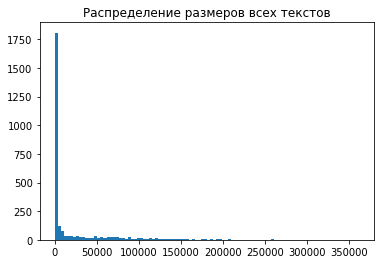

In [ ]:
fsz = list(file_sizes.values())
plt.hist(fsz, bins=100)
plt.title('Распределение размеров всех текстов')

print('Средний размер:', np.mean(fsz))
print('Квантили размеров:', np.quantile(fsz, np.linspace(0, 1, 6)).astype(int))

Средний размер: 54668.37988826816
Квантили размеров: [     1   4229  18700  56333  94664 362260]


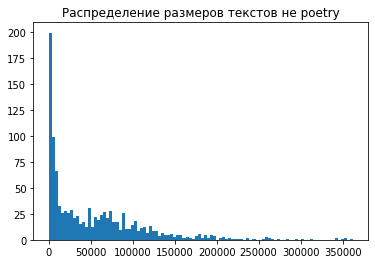

In [ ]:
clean_fsz = list(sz for fname, sz in file_sizes.items() if 'poetry' not in fname.lower())
plt.hist(clean_fsz, bins=100)
plt.title('Распределение размеров текстов не poetry')

print('Средний размер:', np.mean(clean_fsz))
print('Квантили размеров:', np.quantile(clean_fsz, np.linspace(0, 1, 6)).astype(int))

In [ ]:
with open('/content/drive/My Drive/Coursework2021/english_file_sizes.txt', 'w') as f:
    json.dump(file_sizes, f)

In [ ]:
with open('/content/drive/My Drive/Coursework2021/english_file_sizes.txt', 'r') as f:
    file_sizes = json.load(f)

Всего слов 1811610


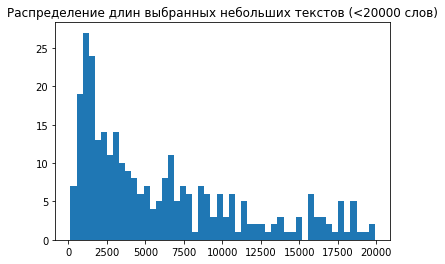

In [ ]:
# выбираю подвыборку английских текстов для препрогона

UPPER_BOUND = 20000
fnames_no_poetry = [fname for fname, sz in file_sizes.items() if 'poetry' not in fname.lower() and 50 < sz < UPPER_BOUND]

fname_sample_idx = np.random.choice(len(fnames_no_poetry), 300, replace=False)

plt.hist([file_sizes[fnames_no_poetry[i]] for i in fname_sample_idx], bins=50)
plt.title(f'Распределение длин выбранных небольших текстов (<{UPPER_BOUND} слов)')
print(f'Всего слов {sum(file_sizes[fnames_no_poetry[i]] for i in fname_sample_idx)}')

In [ ]:
# статистика по маленькой выборке
fnames_sample = [fnames_no_poetry[i] for i in fname_sample_idx]
authors = Counter([re.findall('/content/drive/My Drive/Coursework2021/EnLit/EnLit/(.*)/', fname)[0] for fname in fnames_sample])
text_styles = Counter([re.findall('\((.*?)\)', fname)[0] for fname in fnames_sample])

In [ ]:
authors.most_common()

[('Nathaniel Hawthorne', 56),
 ('Gilbert Keith Chesterton', 42),
 ('Willa Cather', 18),
 ('John Donne', 14),
 ('Gertrude Franklin Horn Atherton', 13),
 ('Eleanor H. Porter', 12),
 ('Anthony Trollope', 12),
 ('Arthur Conan Doyle', 11),
 ('Sherwood Anderson', 10),
 ('Edward Payson Roe', 9),
 ('James M. Barrie', 9),
 ('John Fox Jr', 9),
 ('William Makepeace Thackeray', 8),
 ('Thomas Hardy', 8),
 ('Frank Norris', 8),
 ('Maria Edgeworth', 7),
 ('Robert Louis Stevenson', 6),
 ('Christopher Marlowe', 5),
 ('Kate Douglas Wiggin', 5),
 ('Wilkie Collins', 5),
 ('Mary Roberts Rinehart', 4),
 ('Virginia Woolf', 4),
 ('J. M. Synge', 4),
 ('Rabindranath Tagore', 4),
 ('Daniel Defoe', 3),
 ('John Kendrick Bangs', 3),
 ('Sir Walter Scott', 2),
 ('D.H. Lawrence', 2),
 ('Aldous Huxley', 2),
 ('William Somerset Maugham', 1),
 ('H. Rider Haggard', 1),
 ('Stephen Leacock', 1),
 ('T. S. Eliot', 1),
 ('Irving Bacheller', 1)]

In [ ]:
text_styles.most_common()

[('Short Stories', 185),
 ('Essays', 64),
 ('Fiction', 29),
 ('Plays', 17),
 ('Non-Fiction', 4),
 ('1900', 1)]

In [ ]:
# записываю название текстов на диск (кэш)

with open('/content/drive/My Drive/Coursework2021/en_corpus/2mil.txt', 'w') as f:
    for fname in fnames_sample:
        print(fname, file=f)

In [ ]:
# считываю обратно (кэш)

with open('/content/drive/My Drive/Coursework2021/en_corpus/2mil.txt', 'r') as f:
    fnames_sample = f.read().split('\n')

In [ ]:
ngrams = set()
for fname in tqdm(fnames_sample):
    with open(fname, 'r') as f:
        words = f.read().split()
        for i in range(2, len(words)):
            ngrams.add(' '.join(words[i - 2:i]))
print(len(ngrams))


745960


In [ ]:
# print(ngrams)

### Выбор текстов для автоенкодера (1-2 млн токенов)

Всего слов 1889666


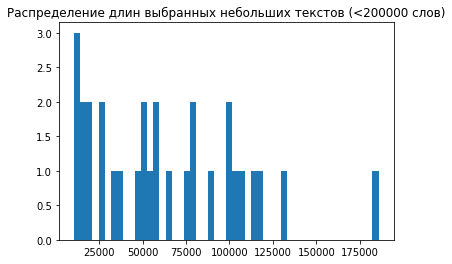

In [ ]:
# выбираю подвыборку английских текстов для препрогона

UPPER_BOUND = 200_000
fnames_no_poetry = [fname for fname, sz in file_sizes.items() if 'poetry' not in fname.lower() and 10000 < sz < UPPER_BOUND]

fname_sample_idx = np.random.choice(len(fnames_no_poetry), 30, replace=False)

plt.hist([file_sizes[fnames_no_poetry[i]] for i in fname_sample_idx], bins=50)
plt.title(f'Распределение длин выбранных небольших текстов (<{UPPER_BOUND} слов)')
print(f'Всего слов {sum(file_sizes[fnames_no_poetry[i]] for i in fname_sample_idx)}')

In [ ]:
fnames_sample = [fnames_no_poetry[i] for i in fname_sample_idx]
authors = Counter([re.findall('/content/drive/My Drive/Coursework2021/EnLit/EnLit/(.*)/', fname)[0] for fname in fnames_sample])
text_styles = Counter([re.findall('\((.*?)\)', fname)[0] for fname in fnames_sample])
print('Число текстов на автора')
authors.most_common()

Число текстов на автора


[('Gilbert Keith Chesterton', 3),
 ('Joseph A. Altsheler', 3),
 ('Arthur Conan Doyle', 2),
 ('John Kendrick Bangs', 2),
 ('Nathaniel Hawthorne', 2),
 ('Maria Edgeworth', 2),
 ('Frank Norris', 1),
 ('Daniel Defoe', 1),
 ('Edward Payson Roe', 1),
 ('Aldous Huxley', 1),
 ('Maynard Barbour', 1),
 ('Thomas Hardy', 1),
 ('Christopher Marlowe', 1),
 ('H. Rider Haggard', 1),
 ('D.H. Lawrence', 1),
 ('Irving Bacheller', 1),
 ('William MacLeod Raine', 1),
 ('Lucy Maud Montgomery', 1),
 ('Robert Louis Stevenson', 1),
 ('Christopher Morley', 1),
 ('Mary Roberts Rinehart', 1),
 ('William Makepeace Thackeray', 1)]

In [ ]:
word_count = defaultdict(int)
authors_list = [re.findall('/content/drive/My Drive/Coursework2021/EnLit/EnLit/(.*)/', fname)[0] for fname in fnames_sample]
for author, fname in zip(authors_list, fnames_sample):
    word_count[author] += file_sizes[fname]

sorted_word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)

# sorting dict
OrderedDict(sorted_word_count)

OrderedDict([('Joseph A. Altsheler', 267400),
             ('D.H. Lawrence', 185757),
             ('Gilbert Keith Chesterton', 148664),
             ('Thomas Hardy', 129973),
             ('Nathaniel Hawthorne', 127909),
             ('Maria Edgeworth', 120180),
             ('Maynard Barbour', 115887),
             ('Lucy Maud Montgomery', 107268),
             ('Arthur Conan Doyle', 106269),
             ('Irving Bacheller', 101862),
             ('Daniel Defoe', 80542),
             ('William MacLeod Raine', 75566),
             ('John Kendrick Bangs', 59730),
             ('H. Rider Haggard', 53923),
             ('Christopher Morley', 52451),
             ('Frank Norris', 51539),
             ('Mary Roberts Rinehart', 35702),
             ('William Makepeace Thackeray', 18449),
             ('Robert Louis Stevenson', 14569),
             ('Christopher Marlowe', 14303),
             ('Aldous Huxley', 11038),
             ('Edward Payson Roe', 10685)])

In [ ]:
# выбранные файлы:

fnames_sample

'["/content/drive/My Drive/Coursework2021/EnLit/EnLit/Frank Norris/Blix(Fiction).txt", "/content/drive/My Drive/Coursework2021/EnLit/EnLit/Arthur Conan Doyle/The Mystery of Cloomber(Fiction).txt", "/content/drive/My Drive/Coursework2021/EnLit/EnLit/Daniel Defoe/Military Memoirs of Capt. George Carleton(Non-Fiction).txt", "/content/drive/My Drive/Coursework2021/EnLit/EnLit/Edward Payson Roe/A Native Author Called Roe(Essays).txt", "/content/drive/My Drive/Coursework2021/EnLit/EnLit/Aldous Huxley/The Gioconda Smile(Short Stories).txt", "/content/drive/My Drive/Coursework2021/EnLit/EnLit/Gilbert Keith Chesterton/The Man Who Was Thursday(Fiction).txt", "/content/drive/My Drive/Coursework2021/EnLit/EnLit/Joseph A. Altsheler/The Lords of the Wild(Fiction).txt", "/content/drive/My Drive/Coursework2021/EnLit/EnLit/Maynard Barbour/The Award of Justice(Fiction).txt", "/content/drive/My Drive/Coursework2021/EnLit/EnLit/Gilbert Keith Chesterton/The Defendant(Non-Fiction).txt", "/content/drive/My D

In [ ]:
# скачиваю файлы для переноса на ск

from google.colab import files
for fname in fnames_sample[15:]:
    files.download(fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(fnames_sample)

30

### Аналитика на `english_corpus.txt`

In [ ]:
print('Слов во всех текстах:', sum(doc_sizes))
word_sets = [set(doc.split()) for doc in documents]
unique_words = set()
for st in word_sets:
    unique_words |= st
print('Уникальных:', len(unique_words))

Слов во всех текстах: 234390533
Уникальных: 315436


In [ ]:
len(documents)

11008

In [ ]:
documents[2]

'ch the early king of GPE1 the country -PRON- now know as GPE1 be the tract of land shut in by ORG1 the bay of biscay the GPE1 the LOC1 and the LOC1 but this country only gain the name of GPE1 by degree in DATE1 of which -PRON- have any account -PRON- be people by the NORP1 and -PRON- be know to the NORP1 as part of a large country which bear the name of PERSON1 after all of -PRON- save LOC1 or what -PRON- now call GPE1 have be conquer and settle by the NORP1 -PRON- be overrun by tribe of the great NORP1 race the same family to which NORP1 belong of these tribe the goth settle in the province to the south the NORP1 in the LOC1 around the LOC1 while the frank come over the river in -PRON- unprotected LOC1 corner and make -PRON- master of a far wide territory break up into CARDINAL1 kingdom that of the eastern franks in what be now GPE1 and that of the western franks reach from the LOC1 to ORG1 subdue all the other NORP1 conqueror of PERSON1 while -PRON- adopt the religion the language a

In [ ]:
caps = set()
for doc in tqdm(documents):
    caps |= set(filter(lambda word: not word.islower(), doc.split()))
caps

{'-PRON-',
 'CARDINAL1',
 'DATE1',
 'EVENT1',
 'FAC1',
 'GPE1',
 'LANGUAGE1',
 'LAW1',
 'LOC1',
 'MONEY1',
 'NORP1',
 'ORDINAL1',
 'ORG1',
 'PERCENT1',
 'PERSON1',
 'PRODUCT1',
 'QUANTITY1',
 'TIME1',
 'WORK_OF_ART1',
 '_',
 '¼',
 '½',
 '¾',
 '⅓'}

Эти специальные токены надо обработать (заменить на представителя класса). Они --- результат `named entity recognition` в `spacy` (`en_core_web_lg`).

# Автоенкодер

## Делаем подвыборку текстов для автоенкодера

In [ ]:
N_DOCS = 10

np.random.seed(123)
docs_idx = np.random.choice(len(documents), size=N_DOCS, replace=False)
docs_sample = [documents[idx] for idx in docs_idx]

In [ ]:
original_docs_idx = list(map(int, """9913  3433  7283  1042  9241  9484  2665  8019   552  9165  8675  4150
		  4211  8970  7304  2306  9028  5470  8524   218  2128  8552  5475  6549
		  5705  2317  3382  6535  9103  4517   228  4225  2636  3825  3253  8663
		  6624  8224  8435  6793  3232  4536  4135  1258   767  8096  8713  1551
		  7252   555  5943  7170 10321  1049  2231  8369  9082 10179   119   592
		  3941  3173  8407  1215   329 10079  9397  2324  9947   229  3588  6680
		  2947  5063  2227  7003  3511  8811  1302  9687  7544  8493  5570  9609
		  1502  8646  6093  1919   200  9861  5664  6337  1613  3790  2862  9665
		  1033  4338   876   525""".split()))

docs_sample = [documents[idx] for idx in original_docs_idx]
print(original_docs_idx)

[9913, 3433, 7283, 1042, 9241, 9484, 2665, 8019, 552, 9165, 8675, 4150, 4211, 8970, 7304, 2306, 9028, 5470, 8524, 218, 2128, 8552, 5475, 6549, 5705, 2317, 3382, 6535, 9103, 4517, 228, 4225, 2636, 3825, 3253, 8663, 6624, 8224, 8435, 6793, 3232, 4536, 4135, 1258, 767, 8096, 8713, 1551, 7252, 555, 5943, 7170, 10321, 1049, 2231, 8369, 9082, 10179, 119, 592, 3941, 3173, 8407, 1215, 329, 10079, 9397, 2324, 9947, 229, 3588, 6680, 2947, 5063, 2227, 7003, 3511, 8811, 1302, 9687, 7544, 8493, 5570, 9609, 1502, 8646, 6093, 1919, 200, 9861, 5664, 6337, 1613, 3790, 2862, 9665, 1033, 4338, 876, 525]


In [ ]:
print(docs_idx)

[1333 9143 7900 7200 3099 5867 5417 9467 7609 9927]


In [ ]:
print(
    'Количество слов в подвыборке текстов:',
    sum(map(lambda doc: doc.count(' '), docs_sample))
)

Количество слов в подвыборке текстов: 1923785


## Получаем вектора из BERT

In [ ]:
!pip3 install transformers

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from scipy import spatial
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from tqdm import tqdm
from transformers import (
    BertModel, BertConfig, BertTokenizer, TrainingArguments, 
    Trainer, LineByLineTextDataset, DataCollatorForLanguageModeling,
    DataCollatorWithPadding, DataCollator, BertForMaskedLM, BertForPreTraining
)

ModuleNotFoundError: ignored

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
config = BertConfig.from_pretrained('bert-base-uncased', output_hidden_states=True)
model = BertModel.from_pretrained('bert-base-uncased', config=config)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenizer.save_pretrained('drive/MyDrive/Coursework2021/bert-base-uncased')
model.save_pretrained('drive/MyDrive/Coursework2021/bert-base-uncased')

In [ ]:
text = 'perfect weather'
def get_ids_tokens(text, tokenizer=tokenizer):
    tokens = tokenizer.tokenize('[CLS] ' + text + ' [SEP]')
    ids = tokenizer.encode(text)
    return ids, tokens

get_ids_tokens(text)

([101, 3819, 4633, 102], ['[CLS]', 'perfect', 'weather', '[SEP]'])

In [ ]:
def get_embeddings_from_last(text, tokenizer=tokenizer, model=model):
    """Вытягивает векторные представления для слов в тексте как крайние hidden states"""
    encoded_input = tokenizer(text, return_tensors='pt')
    word_embeddings = model(**encoded_input)[2][-1][0].detach().numpy()[1:-1]
    return word_embeddings

get_embeddings_from_last('hello there guys')

array([[ 0.07356335, -0.2196039 ,  0.20317924, ..., -0.02935392,
         0.1779071 ,  0.28512973],
       [ 0.3164919 ,  0.40807694, -0.11108729, ..., -0.81638473,
         0.227298  , -0.24182375],
       [ 0.19511358, -0.22377829,  0.20091881, ...,  0.8444742 ,
         0.8268071 , -0.28723466]], dtype=float32)

In [ ]:
def get_embeddings(text, tokenizer=tokenizer, model=model):
    """Вытягивает векторные представления для слов в тексте на основе 4 крайних hidden states"""
    encoded_input = tokenizer(text, return_tensors='pt')
    four_last_hidden = model(**encoded_input)[2][-4:]
    four_last_hidden = np.asarray([hidden[0].detach().numpy() for hidden in four_last_hidden])
    word_embeddings = four_last_hidden[:, 1:-1].sum(axis=0)
    return word_embeddings

get_embeddings('king queen man woman')

array([[ 1.8985329 ,  1.4828641 ,  3.7028997 , ..., -4.339518  ,
        -0.66392106, -3.6544752 ],
       [ 3.6270385 ,  2.4713006 ,  2.0691109 , ..., -4.5484433 ,
        -1.1871322 , -2.1071362 ],
       [-0.4785735 ,  3.6755993 ,  3.6122627 , ..., -3.2774358 ,
         0.66562   , -3.3163805 ],
       [-0.69320405, -0.6555717 , -1.8543705 , ..., -0.9665423 ,
        -0.06166075, -1.6272787 ]], dtype=float32)

In [ ]:
tokenizer(documents[2])

Token indices sequence length is longer than the specified maximum sequence length for this model (36598 > 512). Running this sequence through the model will result in indexing errors


{'input_ids': [101, 10381, 1996, 2220, 2332, 1997, 14246, 2063, 2487, 1996, 2406, 1011, 4013, 2078, 1011, 2085, 2113, 2004, 14246, 2063, 2487, 2022, 1996, 12859, 1997, 2455, 3844, 1999, 2011, 8917, 2487, 1996, 3016, 1997, 20377, 3540, 2100, 1996, 14246, 2063, 2487, 1996, 8840, 2278, 2487, 1998, 1996, 8840, 2278, 2487, 2021, 2023, 2406, 2069, 5114, 1996, 2171, 1997, 14246, 2063, 2487, 2011, 3014, 1999, 3058, 2487, 1997, 2029, 1011, 4013, 2078, 1011, 2031, 2151, 4070, 1011, 4013, 2078, 1011, 2022, 2111, 2011, 1996, 4496, 2361, 2487, 1998, 1011, 4013, 2078, 1011, 2022, 2113, 2000, 1996, 4496, 2361, 2487, 2004, 2112, 1997, 1037, 2312, 2406, 2029, 4562, 1996, 2171, 1997, 2711, 2487, 2044, 2035, 1997, 1011, 4013, 2078, 1011, 3828, 8840, 2278, 2487, 2030, 2054, 1011, 4013, 2078, 1011, 2085, 2655, 14246, 2063, 2487, 2031, 2022, 16152, 1998, 7392, 2011, 1996, 4496, 2361, 2487, 1011, 4013, 2078, 1011, 2022, 24672, 2011, 5917, 1997, 1996, 2307, 4496, 2361, 2487, 2679, 1996, 2168, 2155, 2000, 2029

Отправляем подвыборку в BERT за эмбеддингами

In [ ]:
# checking batch maker

BATCH_SZ = 32

word_cnt = Counter()

total_word_cnt = 0
for document in docs_sample[:10]:
    words = document.split()
    for i in range(0, len(words), BATCH_SZ):
        batch = words[i:i + BATCH_SZ]
        word_cnt.update(Counter(batch))
        total_word_cnt += len(batch)
total_word_cnt  # то же что в ячейке выше? да

312240

In [ ]:
word_cnt.most_common(100)

[('-PRON-', 30366),
 ('the', 16371),
 ('be', 13802),
 ('and', 10069),
 ('to', 8804),
 ('PERSON1', 7930),
 ('of', 7508),
 ('a', 5900),
 ('have', 5365),
 ('in', 4688),
 ('that', 4648),
 ('i', 3971),
 ('not', 3539),
 ('as', 2737),
 ('with', 2510),
 ('do', 2388),
 ('on', 2169),
 ('say', 2124),
 ('but', 2070),
 ('for', 2068),
 ('mr', 1986),
 ('at', 1793),
 ('so', 1692),
 ('CARDINAL1', 1686),
 ('would', 1445),
 ('ORG1', 1406),
 ('all', 1354),
 ('GPE1', 1344),
 ('go', 1277),
 ('man', 1224),
 ('will', 1216),
 ('no', 1208),
 ('there', 1051),
 ('this', 1046),
 ('from', 1035),
 ('could', 1025),
 ('DATE1', 1009),
 ('which', 998),
 ('come', 966),
 ('by', 959),
 ('if', 940),
 ('slope', 934),
 ('make', 931),
 ('out', 927),
 ('when', 899),
 ('see', 888),
 ('then', 888),
 ('know', 837),
 ('think', 824),
 ('what', 819),
 ('very', 801),
 ('up', 775),
 ('who', 762),
 ('mrs', 756),
 ('well', 749),
 ('or', 739),
 ('one', 709),
 ('TIME1', 699),
 ('such', 688),
 ('now', 679),
 ('an', 667),
 ('little', 659),
 

In [ ]:
embed_batches_sample = []  # эмбеддинги для текстов docs_sample

total_word_cnt = 0
for document in tqdm(docs_sample[:10]):
    words = document.split()
    for i in range(0, len(words), BATCH_SZ):
        batch = words[i:i + BATCH_SZ]
        embed_batches_sample.append(get_embeddings(' '.join(batch)))

In [ ]:
print('number of uncleaned batches', len(embed_batches_sample))
print('total tokens in batches', sum(map(len, embed_batches_sample)))

number of uncleaned batches 9761
total tokens in batches 439019


In [ ]:
embed_batches_sample[0].shape

(44, 768)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.layers import InputLayer, Dense
from keras.models import Model, Sequential

ORIGINAL_DIM = 768
TARGET_DIM = 200

encoder = Sequential([
    InputLayer(input_shape=(ORIGINAL_DIM,)),
    # Dense(90, activation='tanh'),
    # Dense(32, activation='relu'),
    Dense(TARGET_DIM, activation='tanh')
])

decoder = Sequential([
    InputLayer(input_shape=(TARGET_DIM,)),
    # Dense(32, activation='relu'),
    # Dense(90, activation='tanh'),
    Dense(ORIGINAL_DIM, activation=None)
])

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')

In [ ]:
autoencoder.count_params()

308168

In [ ]:
# import numpy as np
# train_data = np.random.rand(100_000, 768)
# val_data = np.random.rand(30, 768)
# test_data = np.random.rand(30, 768)

In [ ]:
train_data = np.vstack([batch for batch in embed_batches_sample])
train_data.shape

(439019, 768)

In [ ]:
model_history = autoencoder.fit(train_data, train_data, epochs=6, batch_size=64)#, validation_data=(val_data, val_data))

Epoch 1/6
6860/6860 [==============================] - 47s 7ms/step - loss: 2.1663
Epoch 2/6
6860/6860 [==============================] - 37s 5ms/step - loss: 1.2326
Epoch 3/6
6860/6860 [==============================] - 37s 5ms/step - loss: 1.2072
Epoch 4/6
6860/6860 [==============================] - 37s 5ms/step - loss: 1.2027
Epoch 5/6
6860/6860 [==============================] - 37s 5ms/step - loss: 1.1992
Epoch 6/6
6860/6860 [==============================] - 37s 5ms/step - loss: 1.1986


In [ ]:
model_history.history

{'loss': [0.06289330869913101,
  0.06211361289024353,
  0.061545230448246,
  0.06111234053969383,
  0.06082377955317497,
  0.06063752993941307],
 'val_loss': [0.06272749602794647,
  0.06248430907726288,
  0.06267774105072021,
  0.06290314346551895,
  0.06296861916780472,
  0.06302959471940994]}

In [ ]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [ ]:
import sys

print('size of train_data of 430k tokens is', sys.getsizeof(locals()['train_data']) / 1024 / 1024, 'megabytes')

Todo:

0*. Формализовать исследования, проверить каскадный спуск автоенкодерами (насколько лучше `768 -> 200 -> 50`, нежели `768 -> 50`)

1. Выяснить, как сэплировать слова для обучения (частотные чаще или все слова уникальны в выборке)

2. Пофиксить `train_data` (заменить токены от `spacy` на слова; убрать unknown (?))

3. Обучить заново для нормальной `train_data`, которую и сохранить. Для русского тоже (мб потом?)

4. Продолжить родительский пайплайн (тг)

---

родительский:

План на ср-чт:
1. Проделать заново их код со blob-ом: взять папку с текстами, предобработать, хранить не текст, а список предложений (длина не больше 512). Убрать 1/2, 3/4, ... Особые токены не заменять на entity tag, но числа можно объединить в одно (как и географические объекты, например, словом "география", и т. д.)
2. Предложения из подвыборки текстов (сохранить взятые индексы!) поочерёдно прогонять через BERT (get_embeddings). Оставить текст как список эмбеддингов
3. Использовать этот датасет как обучалку для автоенкодера (stacked версия). Обучить двойной автоенкодер, сохранить модель
4. Прогнать весь датасет для кластеризации через автоенкодер
5. Отправить вектора на кластеризацию (параметры взять те, которые уже попробовали остальные)

---

Глобальная цель:

* сделать много автоенкодеров и получить много словарей для разных целевых длин эмбеддингов.
* сделать такие же автоенкодеры для других языков (рус., англ)
* сделать автоенкодеры для языков и для w2v
* для всего этого добра запустить кластеризацию
* сравнить с svd и с svd к hidden_state для каждой модели для каждого языка 

In [ ]:
# misc

import numpy as np 

zz = np.zeros((10**6, 768), dtype=float)
zz.nbytes / 1024 / 1024, 'megabytes'

In [ ]:
from time import time

st = time()
num = 0
for i in range(10 ** 7):
    num += i % 3
print(time() - st)

# Подготовка текста

In [ ]:
# !pip install gensim
# !pip install -U pip setuptools wheel
# !pip install -U spacy
!spacy download en_core_web_lg
# !pip install natasha

     |████████████████████████████████| 827.9MB 1.3MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=68c281f78f8cdb3276b8c81b4ef845a0489d58c6d6f88a0a0cf552f430df45ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-23966crs/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import re
import gensim
import glob
import en_core_web_lg

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won['’‘`]t", "will not", phrase)
    phrase = re.sub(r"can['’‘`]t", "can not", phrase)
    phrase = re.sub(r"ain['’‘`]t", "am not", phrase)

    # general
    phrase = re.sub(r"n['’‘`]t", " not", phrase)
    phrase = re.sub(r"['’‘`]re", " are", phrase)
    phrase = re.sub(r"['’‘`]s", " is", phrase)
    phrase = re.sub(r"['’‘`]d", " would", phrase)
    phrase = re.sub(r"['’‘`]ll", " will", phrase)
    phrase = re.sub(r"['’‘`]t", " not", phrase)
    phrase = re.sub(r"['’‘`]ve", " have", phrase)
    phrase = re.sub(r"['’‘`]m", " am", phrase)

    #phrase = re.sub('([.;!?])', r' \1 ', phrase)
    phrase = re.sub(r'[^\w.?!;]', ' ', phrase)
    phrase = re.sub(' +', ' ', phrase)
    sentences = re.split('([.;!?] *)', phrase)

    return ' '.join([i.capitalize() for i in  sentences])


def prepare_english_text(input_path, output_path):
    nlp = en_core_web_lg.load(disable=['parser'])
    nlp.max_length = 5000000
    pos_dict = {'PROPN': 'PERSON1', 'PRON': 'PRON1', 'NUM': 'ORDINAL1'}
    file_name =  input_path.split('/')[-1]
    try:
        with open(input_path, 'r') as lit_text:
            raw_text = lit_text.read()
    except Exception as ex:
        return
    
    preprocessed_text = decontracted(raw_text)
    #preprocessed_list = gensim.utils.simple_preprocess(raw_text, min_len=1, max_len=100, deacc = True)
    #preprocessed_text  = ' '.join(preprocessed_list)

    nlp_doc = nlp(preprocessed_text)
    sorted_ents = sorted(nlp_doc.ents, key = lambda x: len(x), reverse =  True)


    for ent in sorted_ents:
        preprocessed_text = preprocessed_text.replace(' ' + ent.text + ' ', ' ' + ent.label_+ '1 ')
        if not ent.text.islower():
            preprocessed_text = preprocessed_text.replace(' ' + ent.text.lower() + ' ', ' ' + ent.label_+ '1 ')

    new_nlp_doc = nlp(preprocessed_text)

    with open(output_path + file_name, 'w') as prepared_text:
        for token in new_nlp_doc:
            if token.text[-1] != '1': 
                if token.pos_ in pos_dict:
                    prepared_text.write(pos_dict[token.pos_])
                    prepared_text.write('\n')
                    
                elif token.pos_ != 'PUNCT':
                    prepared_text.write(token.lemma_.lower())
                    prepared_text.write('\n')

            else:
                prepared_text.write(token.text)
                prepared_text.write('\n')

Выбор оптимального местоимения для замены: (получается `he`)

In [ ]:
prons = ['they', 'it', 'i', 'he', 'she', 'someone', 'who', 'whoever', 'that', 'myself', 'my']

prons = [get_embeddings(pron) for pron in prons]

def vec_metrics(a, b):
    return {
        'rmse': np.mean((a - b) ** 2) ** .5,
        'cosine': cosine(a, b)
    }

she, he = prons[4], prons[3]
print(vec_metrics(she, he))

avg_cosines = []
for i, pron in enumerate(prons):
    cur_cosines = [cosine(pron, pron2) for j, pron2 in enumerate(prons) if i != j]
    avg_cosines.append(np.mean(cur_cosines))

print(avg_cosines)
print('best pron index:', np.argmin(avg_cosines))

{'rmse': 0.8906200141097933, 'cosine': 0.06834912300109863}
[0.23861536383628845, 0.24887626767158508, 0.23184401392936707, 0.21416858434677125, 0.2229945421218872, 0.23298413157463074, 0.31592010855674746, 0.35806862115859983, 0.3497359871864319, 0.3393749713897705, 0.28507325053215027]
best pron index: 3


Смотрю на токены в spacy

In [ ]:
nlp = en_core_web_lg.load(disable=['parser'])
nlp.max_length = 5000000

In [ ]:
spacy_ent2word = {
    'CARDINAL': 'NUMBER',
    'DATE': 'DATE',
    'EVENT': 'EVENT',
    'FAC': 'FACILITY',
    'GPE': 'COUNTRY',
    'LANGUAGE': 'LANGUAGE',
    'LAW': 'LAW',
    'LOC': 'LOCATION',
    'MONEY': 'MONEY',
    'NORP': 'NATION',
    'ORDINAL': 'FIRST',
    'ORG': 'COMPANY',
    'PERCENT': 'PERCENT',
    'PERSON': 'PERSON',
    'PRODUCT': 'PRODUCT',
    'QUANTITY': 'QUANTITY',
    'TIME': 'TIME',
    'WORK_OF_ART': 'ART',
}
    
def prepare_english_text(text):
    # nlp = en_core_web_lg.load(disable=['parser'])
    # nlp.max_length = 5000000

    pos_dict = {'PRON': 'HE', 'NUM': 'NUMBER'}

    preprocessed_text = decontracted(text)

    nlp_doc = nlp(preprocessed_text)

    result_text = ''
    for token in nlp_doc:
        print('\t', token, token.text, token.pos_, token.lemma_)
        if token.ent_type_ != '':
            result_text += token.text + ' '
            continue
        if token.pos_ == 'PUNCT':
            continue
        result_word = token.text
        if token.pos_ in pos_dict:
            result_word = pos_dict[token.pos_]
        elif token.lemma_[1:-1] in pos_dict:  # например, "my" -> "-PRON-"
            result_word = pos_dict[token.lemma_[1:-1]]
        else:
            if not token.lemma_.islower() and token.lemma_ != ' ':
                print('preprocessing: token.lemma_ has upper case --- ', token, token.lemma_, file=sys.stderr)
            result_word = token.lemma_.lower()
        result_text += result_word + ' '

    sorted_ents = sorted(nlp_doc.ents, key=len, reverse=True)
    for ent in sorted_ents:
        print(ent.text, ent.label_)
        result_text = result_text.replace(' ' + ent.text + ' ', ' ' + spacy_ent2word[ent.label_] + ' ')
        # if not ent.text.islower():
        #     preprocessed_text = preprocessed_text.replace(' ' + ent.text.lower() + ' ', ' ' + spacy_ent2word[ent.label_] + ' ')

    return re.sub(r'\s\s+', ' ', result_text).strip()

In [ ]:
sample_text = """I'm loving Mars and other goods.          These are my favourite     chocolate bars.

I really love these!

123
And I come from Moscow."""

sample_text = """I'm loving Mars and other goods.          These are my favourite     chocolate bars.

I really love these!

123
And I come from Moscow.

Ural Mountains are very high. Let's go to France maybe, and English language. They don't use US Dollars there though...

Moscow, Saint Petersburg, London, England, UK, United States, Australia. """

In [ ]:
preprocessed_text = prepare_english_text(sample_text)

	 I I PRON -PRON-
	 am am AUX be
	 loving loving VERB love
	 mars mars PROPN mars
	 and and CCONJ and
	 other other ADJ other
	 goods goods NOUN good
	 . . PUNCT .
	     SPACE  
	 These These DET these
	 are are AUX be
	 my my DET -PRON-
	 favourite favourite ADJ favourite
	 chocolate chocolate NOUN chocolate
	 bars bars NOUN bar
	 . . PUNCT .
	     SPACE  
	 I I PRON -PRON-
	 really really ADV really
	 love love VERB love
	 these these DET these
	 ! ! PUNCT !
	     SPACE  
	 123 123 NUM 123
	 and and CCONJ and
	 i i PRON i
	 come come VERB come
	 from from ADP from
	 moscow moscow PROPN moscow
	 . . PUNCT .
	     SPACE  
	 Ural Ural PROPN Ural
	 mountains mountains NOUN mountain
	 are are AUX be
	 very very ADV very
	 high high ADJ high
	 . . PUNCT .
	     SPACE  
	 Let Let VERB let
	 is is AUX be
	 go go VERB go
	 to to ADP to
	 france france PROPN france
	 maybe maybe ADV maybe
	 and and CCONJ and
	 english english PROPN english
	 language language NOUN language
	 . . PUNCT .
	     

In [ ]:
preprocessed_text

'HE be love LOCATION and other good these be HE favourite chocolate bar HE really love these NUMBER and HE come from COUNTRY NATION mountain be very high let be go to COUNTRY maybe and LANGUAGE language HE do not use us dollar there though COUNTRY COMPANY london COUNTRY COUNTRY COUNTRY COUNTRY'

In [ ]:
print(tokenizer.tokenize(' '.join(spacy_ent2word.values())))
print(tokenizer.tokenize('London'))

['number', 'date', 'event', 'facility', 'country', 'language', 'law', 'location', 'money', 'nation', 'first', 'company', 'percent', 'person', 'product', 'quantity', 'time', 'art']
['london']


# Анализ данных для автоенкодера

In [ ]:
sentence_lens = []
with open('drive/MyDrive/Coursework2021/sticked_file.txt', 'r') as f:
    for sentence in f:
        sentence_lens.append(len(sentence.split()))

sentence_lens = np.asarray(sentence_lens, dtype=int)

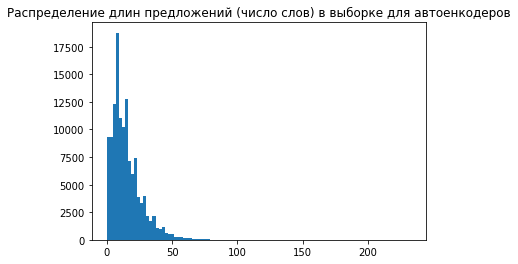

In [ ]:
plt.hist(sentence_lens, bins=100)
plt.title('Распределение длин предложений (число слов) в выборке для автоенкодеров')
plt.show()

Заготовка для кода а/е на суперкомпьтере

In [ ]:
import numpy as np
import sys
from keras.callbacks import History
from keras.layers import InputLayer, Dense
from keras.models import Model, Sequential
from sklearn.metrics import mean_squared_error as mse
from typing import List, Optional, Sequence


class Autoencoder(Model):
    """
    Холдер для одного автоенкодера
    """
    def __init__(self, input_dim: int, output_dim: int, activation: Optional[str] = None) -> None:
        super(Autoencoder, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activation = activation
        self.build_autoencoder()

    def call(self, inputs):
        return self.autoencoder(inputs)

    def build_autoencoder(self) -> None:
        self.encoder = Sequential([
            InputLayer(input_shape=(self.input_dim,)),
            # Dense(90, activation='tanh'),
            # Dense(32, activation='relu'),
            Dense(self.output_dim, activation=self.activation)
        ])
        self.decoder = Sequential([
            InputLayer(input_shape=(self.output_dim,)),
            # Dense(32, activation='relu'),
            # Dense(90, activation='tanh'),
            Dense(self.input_dim, activation=None)
        ])
        self.autoencoder = Model(inputs=self.encoder.input, outputs=self.decoder(self.encoder.output))
        self.autoencoder.compile(loss='mse', optimizer='adam')


class StackedAutoencoder:
    """
    Ступенчатый автоенкодер: отдельно обучается каждый слой-encoder на основе результатов предыдущего слоя
    """
    def __init__(self, dims: Sequence[int], activation: Optional[str] = 'tanh') -> None:
        """:param dims: все размерности шагов (от input_dim до output_dim)"""
        self.dims = dims
        self.input_dim = dims[0]
        self.output_dim = dims[-1]
        self.autoencoders = [Autoencoder(dims[i - 1], dims[i], activation=activation) for i in range(1, len(dims))]

    def fit(self, train_data: np.ndarray, val_data: Optional[np.ndarray] = None, verbose: bool = False, epochs: int = 10) -> List[History]:
        if verbose:
            print(f'\nStackAutoencoder: fitting {len(self.autoencoders)} autoencoders with dimensions {self.dims}', flush=True)

        train_data_reduced = train_data
        val_data_reduced = val_data
        self.model_histories = []
        for i, autoencoder in enumerate(self.autoencoders):
            autoencoder.compile(loss='mse', optimizer='adam')
            if verbose:
                print(f'\tfitting autoencoder number {i} with dimensions {autoencoder.input_dim, autoencoder.output_dim}', file=sys.stderr)
            model_history = autoencoder.fit(
                x=train_data_reduced,
                y=train_data_reduced,
                epochs=epochs,
                batch_size=64,
                validation_data=(val_data_reduced, val_data_reduced),
                shuffle=True,
                verbose=verbose,
                # callbacks=[tensorboard]
            )
            train_data_reduced = autoencoder.encoder(train_data_reduced)
            val_data_reduced = autoencoder.encoder(val_data_reduced)
            self.model_histories.append(model_history)
            if verbose:
                print(f'StackedAutoencoder: autoencoder {i} - model history\n{model_history.history}', flush=True)

        self.fine_tune(train_data, val_data, verbose, epochs)
        return self.model_histories

    def fine_tune(self, train_data: np.ndarray, val_data: Optional[np.ndarray] = None, verbose: bool = False, epochs: int = 10) -> None:
        """Дообучает всю цепь сразу"""
        if verbose:
            print(f'StackedAutoencoder: fine-tuning...')

        self.autoencoder_sequence = Sequential()
        for autoencoder in self.autoencoders:
            self.autoencoder_sequence.add(autoencoder.encoder)
        for autoencoder in self.autoencoders[::-1]:
            self.autoencoder_sequence.add(autoencoder.decoder)

        self.autoencoder_sequence.compile(loss='mse', optimizer='adam')
        self.finetune_history = self.autoencoder_sequence.fit(
            x=train_data,
            y=train_data,
            epochs=epochs,
            batch_size=64,
            validation_data=(val_data, val_data),
            shuffle=True,
            verbose=verbose
        )
        if verbose:
            print(f'StackedAutoencoder: fine-tuning history model history\n{self.finetune_history.history}')

    def encode(self, data: np.ndarray) -> np.ndarray:
        for autoencoder in self.autoencoders:
            data = autoencoder.encoder(data)
        return data

    def decode(self, data: np.ndarray) -> np.ndarray:
        for autoencoder in self.autoencoders[::-1]:
            data = autoencoder.decoder(data)
        return data

In [ ]:
sa = StackedAutoencoder([768, 500, 100])
sa.fit(train_data, val_data, True)

SyntaxError: ignored

In [ ]:
sa.model_histories

In [ ]:
from sklearn.metrics import mean_squared_error as mse


train_data_ae = sa.decode(sa.encode(train_data))
mse(train_data, train_data_ae)

0.0742634160434713

In [ ]:
# sa

train_data = np.load('drive/MyDrive/Coursework2021/autoencoder/test/embeddings.npy')  # switch to train further

In [ ]:
sa = StackedAutoencoder([400, 300, 200, 100], activation='LeakyReLU')
sa.fit(train_data[:75000, :400], train_data[75000:, :400], True)


StackAutoencoder: fitting 3 autoencoders with dimensions [400, 300, 200, 100]
	fitting autoencoder number 0 with dimensions (400, 300)


Epoch 1/10
1172/1172 [==============================] - 60s 6ms/step - loss: 2.1924 - val_loss: 0.4157
Epoch 2/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.3663 - val_loss: 0.3525
Epoch 3/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.3219 - val_loss: 0.3323
Epoch 4/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.3099 - val_loss: 0.3301
Epoch 5/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.3050 - val_loss: 0.3233
Epoch 6/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.3018 - val_loss: 0.3239
Epoch 7/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.2997 - val_loss: 0.3226
Epoch 8/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.2976 - val_loss: 0.3229
Epoch 9/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.2966 - val_loss: 0.3205
Epoch 10/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.29

	fitting autoencoder number 1 with dimensions (300, 200)


Epoch 1/10
1172/1172 [==============================] - 6s 5ms/step - loss: 2.1065 - val_loss: 0.6382
Epoch 2/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.5155 - val_loss: 0.3751
Epoch 3/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.3418 - val_loss: 0.3305
Epoch 4/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.3108 - val_loss: 0.3168
Epoch 5/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.3005 - val_loss: 0.3137
Epoch 6/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.2951 - val_loss: 0.3101
Epoch 7/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.2917 - val_loss: 0.3078
Epoch 8/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.2901 - val_loss: 0.3075
Epoch 9/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.2896 - val_loss: 0.3066
Epoch 10/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.288

	fitting autoencoder number 2 with dimensions (200, 100)


Epoch 1/10
1172/1172 [==============================] - 4s 3ms/step - loss: 1.5020 - val_loss: 0.6008
Epoch 2/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.5200 - val_loss: 0.4539
Epoch 3/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.4301 - val_loss: 0.4296
Epoch 4/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.4105 - val_loss: 0.4244
Epoch 5/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.4030 - val_loss: 0.4186
Epoch 6/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.3997 - val_loss: 0.4165
Epoch 7/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.3985 - val_loss: 0.4126
Epoch 8/10
1172/1172 [==============================] - 3s 3ms/step - loss: 0.3971 - val_loss: 0.4137
Epoch 9/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.3943 - val_loss: 0.4131
Epoch 10/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.394

In [ ]:
mse(sa.decode(sa.encode(train_data[:75000, :400])), train_data[:75000, :400])  # (с просто автоенкодером было ~1.4-1.5 to 1.6)

1.8263515

In [ ]:
# encoded_train = sa.autoencoders[0].encoder(train_data[:75000])
encoded_train.numpy().mean(axis=0)

array([ 5.04771695e-02,  3.14634293e-02,  2.19576657e-02,  1.86826326e-02,
       -3.68635952e-02,  3.10710026e-03, -1.14733852e-01, -1.01467259e-01,
       -7.76787251e-02,  5.78321740e-02,  4.37030904e-02, -3.19610769e-03,
       -2.03715619e-02,  4.61229496e-02,  8.78743827e-01, -6.52614562e-03,
        7.34758303e-02,  1.50829917e-02, -2.66951807e-02, -5.61798774e-02,
       -2.23516803e-02, -1.61042418e-02, -2.35737916e-02,  8.53385866e-01,
        1.00000000e+00, -6.39373728e-04,  1.37768835e-02,  1.27317756e-01,
        6.95799419e-04,  1.40190134e-02,  9.09221351e-01, -1.68406665e-02,
       -1.14607541e-02, -1.70303807e-01,  5.98439015e-02, -3.81856821e-02,
       -1.27365720e-02, -5.43667786e-02, -1.19479848e-02,  1.49504831e-02,
       -9.96744692e-01,  2.75003910e-02,  1.05099492e-02,  2.05947980e-02,
       -7.04606771e-02, -4.45290748e-03, -8.96126851e-02,  6.31489754e-02,
       -7.32826348e-03, -1.07630966e-02,  9.61513519e-01, -5.71018048e-02,
       -7.12499619e-02,  

In [ ]:
# autoencoder.compile('adam', 'mse')
autoencoder.fit(train_data, train_data, batch_size=64, epochs=20)

Epoch 1/20
1307/1307 [==============================] - 9s 7ms/step - loss: 1.3027
Epoch 2/20
1307/1307 [==============================] - 8s 6ms/step - loss: 1.3019
Epoch 3/20
1307/1307 [==============================] - 7s 6ms/step - loss: 1.2995
Epoch 4/20
1307/1307 [==============================] - 7s 6ms/step - loss: 1.2993
Epoch 5/20
1307/1307 [==============================] - 7s 6ms/step - loss: 1.2964
Epoch 6/20
1307/1307 [==============================] - 8s 6ms/step - loss: 1.2961
Epoch 7/20
1307/1307 [==============================] - 7s 6ms/step - loss: 1.2962
Epoch 8/20
1307/1307 [==============================] - 7s 6ms/step - loss: 1.2947
Epoch 9/20
1307/1307 [==============================] - 7s 6ms/step - loss: 1.2929
Epoch 10/20
 766/1307 [================>.............] - ETA: 3s - loss: 1.2935

KeyboardInterrupt: ignored

### сравниваю с PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
train_data_pca = pca.fit_transform(train_data[:75000, :400])

train_data_pca_reconstructed = pca.inverse_transform(train_data_pca)
mse(train_data[:75000, :400], train_data_pca_reconstructed)

1.4661937

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
train_data_pca = pca.fit_transform(train_data)

train_data_pca_reconstructed = pca.inverse_transform(train_data_pca)
mse(train_data, train_data_pca_reconstructed)

1.7946674

### Автоенкодер на вокабуляре без контекста

In [ ]:
bert_embeddings = np.load('drive/MyDrive/Coursework2021/bert_base_uncased_vocab_embeddings.npy')
with open('drive/MyDrive/Coursework2021/bert_base_uncased_vocab.txt', 'r') as f:
    bert_tokens = f.read().split('\n')

In [ ]:
bert_embeddings.shape, len(bert_tokens)

((30522, 768), 30523)

#### Анализ сходимости

In [ ]:
sae = StackedAutoencoder([768, 64])
sae.fit(bert_embeddings, bert_embeddings, True)


StackAutoencoder: fitting 1 autoencoders with dimensions [768, 64]
	fitting autoencoder number 0 with dimensions (768, 64)


Epoch 1/10
477/477 [==============================] - 3s 5ms/step - loss: 2.9718 - val_loss: 1.5777
Epoch 2/10
477/477 [==============================] - 3s 6ms/step - loss: 1.4985 - val_loss: 1.3510
Epoch 3/10
477/477 [==============================] - 2s 4ms/step - loss: 1.3186 - val_loss: 1.2486
Epoch 4/10
477/477 [==============================] - 3s 6ms/step - loss: 1.2295 - val_loss: 1.1792
Epoch 5/10
477/477 [==============================] - 2s 5ms/step - loss: 1.1671 - val_loss: 1.1231
Epoch 6/10
477/477 [==============================] - 3s 6ms/step - loss: 1.1126 - val_loss: 1.0808
Epoch 7/10
477/477 [==============================] - 3s 6ms/step - loss: 1.0784 - val_loss: 1.0505
Epoch 8/10
477/477 [==============================] - 2s 5ms/step - loss: 1.0474 - val_loss: 1.0249
Epoch 9/10
477/477 [==============================] - 3s 6ms/step - loss: 1.0136 - val_loss: 1.0052
Epoch 10/10
477/477 [==============================] - 2s 4ms/step - loss: 0.9941 - val_loss: 0.9843

In [ ]:
# full reconstruction

sae = StackedAutoencoder([768, 768])
sae.fit(bert_embeddings[:, :768], bert_embeddings[:, :768], verbose=True, epochs=50)

477/477 [==============================] - 9s 19ms/step - loss: 0.1202 - val_loss: 0.1131
Epoch 15/50
477/477 [==============================] - 9s 20ms/step - loss: 0.1180 - val_loss: 0.1129
Epoch 16/50
477/477 [==============================] - 9s 19ms/step - loss: 0.1133 - val_loss: 0.1104
Epoch 17/50
477/477 [==============================] - 9s 19ms/step - loss: 0.1113 - val_loss: 0.1173
Epoch 18/50
477/477 [==============================] - 9s 20ms/step - loss: 0.1093 - val_loss: 0.1039
Epoch 19/50
477/477 [==============================] - 9s 20ms/step - loss: 0.1074 - val_loss: 0.1192
Epoch 20/50
477/477 [==============================] - 9s 19ms/step - loss: 0.1077 - val_loss: 0.1083
Epoch 21/50
477/477 [==============================] - 9s 20ms/step - loss: 0.1036 - val_loss: 0.0975
Epoch 22/50
477/477 [==============================] - 9s 20ms/step - loss: 0.1016 - val_loss: 0.0997
Epoch 23/50
477/477 [==============================] - 10s 20ms/step - loss: 0.1025 - val_loss

In [ ]:
# reconstruction no activation

sae = StackedAutoencoder([768, 768], activation=None)
sae.fit(bert_embeddings, bert_embeddings, verbose=True, epochs=100)

In [ ]:
# shrinked vectors

sae = StackedAutoencoder([100, 80])
sae.fit(bert_embeddings[:, :100], bert_embeddings[:, :100], verbose=True, epochs=100)


StackAutoencoder: fitting 1 autoencoders with dimensions [100, 80]
	fitting autoencoder number 0 with dimensions (100, 80)


Epoch 1/100
477/477 [==============================] - 2s 3ms/step - loss: 2.2031 - val_loss: 0.8363
Epoch 2/100
477/477 [==============================] - 1s 3ms/step - loss: 0.7280 - val_loss: 0.4948
Epoch 3/100
477/477 [==============================] - 1s 3ms/step - loss: 0.4485 - val_loss: 0.3407
Epoch 4/100
477/477 [==============================] - 1s 3ms/step - loss: 0.3183 - val_loss: 0.2613
Epoch 5/100
477/477 [==============================] - 1s 3ms/step - loss: 0.2507 - val_loss: 0.2172
Epoch 6/100
477/477 [==============================] - 1s 3ms/step - loss: 0.2096 - val_loss: 0.1858
Epoch 7/100
477/477 [==============================] - 1s 3ms/step - loss: 0.1817 - val_loss: 0.1670
Epoch 8/100
477/477 [==============================] - 1s 3ms/step - loss: 0.1648 - val_loss: 0.1547
Epoch 9/100
477/477 [==============================] - 1s 3ms/step - loss: 0.1541 - val_loss: 0.1464
Epoch 10/100
477/477 [==============================] - 1s 3ms/step - loss: 0.1443 - val_lo

In [ ]:
# shrinked vectors no activation

sae = StackedAutoencoder([100, 80], activation=None)
sae.fit(bert_embeddings[:, :100], bert_embeddings[:, :100], verbose=True, epochs=100)

Epoch 1/100



StackAutoencoder: fitting 1 autoencoders with dimensions [100, 80]
	fitting autoencoder number 0 with dimensions (100, 80)


477/477 [==============================] - 2s 3ms/step - loss: 2.4144 - val_loss: 0.3788
Epoch 2/100
477/477 [==============================] - 1s 3ms/step - loss: 0.3100 - val_loss: 0.1789
Epoch 3/100
477/477 [==============================] - 1s 3ms/step - loss: 0.1614 - val_loss: 0.1269
Epoch 4/100
477/477 [==============================] - 1s 3ms/step - loss: 0.1231 - val_loss: 0.1124
Epoch 5/100
477/477 [==============================] - 1s 3ms/step - loss: 0.1108 - val_loss: 0.1057
Epoch 6/100
477/477 [==============================] - 1s 3ms/step - loss: 0.1053 - val_loss: 0.1018
Epoch 7/100
477/477 [==============================] - 1s 3ms/step - loss: 0.1019 - val_loss: 0.0995
Epoch 8/100
477/477 [==============================] - 1s 3ms/step - loss: 0.0993 - val_loss: 0.0979
Epoch 9/100
477/477 [==============================] - 1s 3ms/step - loss: 0.0990 - val_loss: 0.0976
Epoch 10/100
477/477 [==============================] - 1s 3ms/step - loss: 0.0974 - val_loss: 0.0965
E

KeyboardInterrupt: ignored

In [ ]:
# full reconstruction long

sae = StackedAutoencoder([768, 768])
sae.fit(bert_embeddings[:, :768], bert_embeddings[:, :768], verbose=True, epochs=400)


StackAutoencoder: fitting 1 autoencoders with dimensions [768, 768]
	fitting autoencoder number 0 with dimensions (768, 768)


Epoch 1/400
477/477 [==============================] - 10s 20ms/step - loss: 1.4496 - val_loss: 0.5284
Epoch 2/400
477/477 [==============================] - 9s 19ms/step - loss: 0.4743 - val_loss: 0.3570
Epoch 3/400
477/477 [==============================] - 9s 19ms/step - loss: 0.3372 - val_loss: 0.2778
Epoch 4/400
477/477 [==============================] - 9s 19ms/step - loss: 0.2671 - val_loss: 0.2318
Epoch 5/400
477/477 [==============================] - 9s 19ms/step - loss: 0.2269 - val_loss: 0.2045
Epoch 6/400
477/477 [==============================] - 9s 19ms/step - loss: 0.1993 - val_loss: 0.1808
Epoch 7/400
477/477 [==============================] - 9s 19ms/step - loss: 0.1767 - val_loss: 0.1661
Epoch 8/400
477/477 [==============================] - 9s 19ms/step - loss: 0.1632 - val_loss: 0.1565
Epoch 9/400
477/477 [==============================] - 9s 19ms/step - loss: 0.1536 - val_loss: 0.1388
Epoch 10/400
477/477 [==============================] - 9s 19ms/step - loss: 0.14

In [ ]:
# full reconstruction long

sae = StackedAutoencoder([768, 768], activation='sigmoid')
sae.fit(bert_embeddings[:, :768], bert_embeddings[:, :768], verbose=True, epochs=400)


StackAutoencoder: fitting 1 autoencoders with dimensions [768, 768]
	fitting autoencoder number 0 with dimensions (768, 768)


Epoch 1/400
477/477 [==============================] - 10s 20ms/step - loss: 1.6330 - val_loss: 0.6175
Epoch 2/400
477/477 [==============================] - 9s 20ms/step - loss: 0.5379 - val_loss: 0.3626
Epoch 3/400
477/477 [==============================] - 9s 19ms/step - loss: 0.3373 - val_loss: 0.2603
Epoch 4/400
477/477 [==============================] - 9s 20ms/step - loss: 0.2484 - val_loss: 0.2082
Epoch 5/400
477/477 [==============================] - 9s 19ms/step - loss: 0.1992 - val_loss: 0.1698
Epoch 6/400
477/477 [==============================] - 9s 20ms/step - loss: 0.1661 - val_loss: 0.1454
Epoch 7/400
477/477 [==============================] - 9s 19ms/step - loss: 0.1441 - val_loss: 0.1293
Epoch 8/400
477/477 [==============================] - 9s 19ms/step - loss: 0.1253 - val_loss: 0.1142
Epoch 9/400
477/477 [==============================] - 9s 19ms/step - loss: 0.1109 - val_loss: 0.0983
Epoch 10/400
477/477 [==============================] - 10s 21ms/step - loss: 0.0

In [ ]:
# full reconstruction long

sae = StackedAutoencoder([768, 768], activation='LeakyReLU')
sae.fit(bert_embeddings[:, :768], bert_embeddings[:, :768], verbose=True, epochs=400)


StackAutoencoder: fitting 1 autoencoders with dimensions [768, 768]
	fitting autoencoder number 0 with dimensions (768, 768)


Epoch 1/400
477/477 [==============================] - 53s 20ms/step - loss: 1.3385 - val_loss: 0.2750
Epoch 2/400
477/477 [==============================] - 9s 19ms/step - loss: 0.2324 - val_loss: 0.1470
Epoch 3/400
477/477 [==============================] - 9s 19ms/step - loss: 0.1340 - val_loss: 0.0964
Epoch 4/400
477/477 [==============================] - 9s 20ms/step - loss: 0.0922 - val_loss: 0.0753
Epoch 5/400
477/477 [==============================] - 9s 20ms/step - loss: 0.0712 - val_loss: 0.0568
Epoch 6/400
477/477 [==============================] - 9s 20ms/step - loss: 0.0546 - val_loss: 0.0451
Epoch 7/400
477/477 [==============================] - 9s 20ms/step - loss: 0.0451 - val_loss: 0.0386
Epoch 8/400
477/477 [==============================] - 9s 20ms/step - loss: 0.0363 - val_loss: 0.0302
Epoch 9/400
477/477 [==============================] - 9s 19ms/step - loss: 0.0309 - val_loss: 0.0306
Epoch 10/400
477/477 [==============================] - 9s 20ms/step - loss: 0.02

KeyboardInterrupt: ignored

In [ ]:
autoencoder.fit(bert_embeddings, bert_embeddings, epochs=6, batch_size=64)

Epoch 1/6
477/477 [==============================] - 4s 7ms/step - loss: 0.5589
Epoch 2/6
477/477 [==============================] - 3s 7ms/step - loss: 0.5312
Epoch 3/6
477/477 [==============================] - 3s 7ms/step - loss: 0.5092
Epoch 4/6
477/477 [==============================] - 3s 6ms/step - loss: 0.4897
Epoch 5/6
477/477 [==============================] - 3s 6ms/step - loss: 0.4770
Epoch 6/6
477/477 [==============================] - 4s 8ms/step - loss: 0.4650


#### MNIST Autoencoder quality test

In [ ]:
from keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))


11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
sae_mnist = StackedAutoencoder([784, 64])
sae_mnist.fit(X_train, X_test, verbose=True)


StackAutoencoder: fitting 1 autoencoders with dimensions [784, 64]
	fitting autoencoder number 0 with dimensions (784, 64)


Epoch 1/10
938/938 [==============================] - 61s 65ms/step - loss: 0.0356 - val_loss: 0.0110
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0108 - val_loss: 0.0099
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0095 - val_loss: 0.00

#### Перебор для перехода 768 -> 600

In [ ]:
sae = StackedAutoencoder([768, 600, 400], activation='LeakyReLU')
sae.fit(bert_embeddings, bert_embeddings, verbose=True, epochs=40)


StackAutoencoder: fitting 2 autoencoders with dimensions [768, 600, 400]
	fitting autoencoder number 0 with dimensions (768, 600)


Epoch 1/40
477/477 [==============================] - 9s 17ms/step - loss: 1.3889 - val_loss: 0.3309
Epoch 2/40
477/477 [==============================] - 8s 16ms/step - loss: 0.2833 - val_loss: 0.1847
Epoch 3/40
477/477 [==============================] - 8s 16ms/step - loss: 0.1697 - val_loss: 0.1299
Epoch 4/40
477/477 [==============================] - 8s 16ms/step - loss: 0.1256 - val_loss: 0.1011
Epoch 5/40
477/477 [==============================] - 8s 16ms/step - loss: 0.0992 - val_loss: 0.0871
Epoch 6/40
477/477 [==============================] - 8s 16ms/step - loss: 0.0825 - val_loss: 0.0748
Epoch 7/40
477/477 [==============================] - 8s 16ms/step - loss: 0.0716 - val_loss: 0.0635
Epoch 8/40
477/477 [==============================] - 8s 16ms/step - loss: 0.0641 - val_loss: 0.0599
Epoch 9/40
477/477 [==============================] - 8s 16ms/step - loss: 0.0577 - val_loss: 0.0522
Epoch 10/40
477/477 [==============================] - 8s 16ms/step - loss: 0.0549 - val_lo

	fitting autoencoder number 1 with dimensions (600, 400)


Epoch 1/40
477/477 [==============================] - 6s 11ms/step - loss: 0.8433 - val_loss: 0.3174
Epoch 2/40
477/477 [==============================] - 5s 10ms/step - loss: 0.2709 - val_loss: 0.1759
Epoch 3/40
477/477 [==============================] - 5s 10ms/step - loss: 0.1610 - val_loss: 0.1225
Epoch 4/40
477/477 [==============================] - 6s 13ms/step - loss: 0.1145 - val_loss: 0.0944
Epoch 5/40
477/477 [==============================] - 5s 10ms/step - loss: 0.0916 - val_loss: 0.0783
Epoch 6/40
477/477 [==============================] - 5s 10ms/step - loss: 0.0772 - val_loss: 0.0701
Epoch 7/40
477/477 [==============================] - 5s 10ms/step - loss: 0.0683 - val_loss: 0.0633
Epoch 8/40
477/477 [==============================] - 5s 10ms/step - loss: 0.0631 - val_loss: 0.0620
Epoch 9/40
477/477 [==============================] - 5s 10ms/step - loss: 0.0591 - val_loss: 0.0565
Epoch 10/40
477/477 [==============================] - 5s 10ms/step - loss: 0.0567 - val_lo

KeyboardInterrupt: ignored

In [ ]:
mse(bert_embeddings, sae.decode(sae.encode(bert_embeddings)))

0.15034533

In [ ]:
mse(train_data, sae.decode(sae.encode(train_data)))

6.2651944

Добавил файнтюнинг по всей цепи...

In [ ]:
# до файнтьюнинга
sae = StackedAutoencoder([768, 600, 400], activation='LeakyReLU')
sae.fit(bert_embeddings, bert_embeddings, verbose=True, epochs=4)


StackAutoencoder: fitting 2 autoencoders with dimensions [768, 600, 400]
Epoch 1/4


	fitting autoencoder number 0 with dimensions (768, 600)


477/477 [==============================] - 9s 18ms/step - loss: 1.4110 - val_loss: 0.3332
Epoch 2/4
477/477 [==============================] - 8s 17ms/step - loss: 0.2882 - val_loss: 0.1874
Epoch 3/4
477/477 [==============================] - 8s 17ms/step - loss: 0.1735 - val_loss: 0.1327
Epoch 4/4
477/477 [==============================] - 8s 17ms/step - loss: 0.1262 - val_loss: 0.1022
StackedAutoencoder: autoencoder 0 - model history
Epoch 1/4


	fitting autoencoder number 1 with dimensions (600, 400)


477/477 [==============================] - 7s 12ms/step - loss: 1.2081 - val_loss: 0.3549
Epoch 2/4
477/477 [==============================] - 6s 12ms/step - loss: 0.2873 - val_loss: 0.1636
Epoch 3/4
477/477 [==============================] - 6s 12ms/step - loss: 0.1464 - val_loss: 0.1048
Epoch 4/4
477/477 [==============================] - 6s 12ms/step - loss: 0.0968 - val_loss: 0.0796
StackedAutoencoder: autoencoder 1 - model history


In [ ]:
mse(bert_embeddings, sae.decode(sae.encode(bert_embeddings)))

0.23899229

In [ ]:
# с файнтьюнингом
sae = StackedAutoencoder([768, 600, 400], activation='LeakyReLU')
sae.fit(bert_embeddings, bert_embeddings, verbose=True, epochs=4)


StackAutoencoder: fitting 2 autoencoders with dimensions [768, 600, 400]
Epoch 1/4


	fitting autoencoder number 0 with dimensions (768, 600)


477/477 [==============================] - 9s 18ms/step - loss: 1.3799 - val_loss: 0.3303
Epoch 2/4
477/477 [==============================] - 8s 17ms/step - loss: 0.2809 - val_loss: 0.1856
Epoch 3/4
477/477 [==============================] - 8s 17ms/step - loss: 0.1716 - val_loss: 0.1318
Epoch 4/4
477/477 [==============================] - 8s 17ms/step - loss: 0.1260 - val_loss: 0.1049
StackedAutoencoder: autoencoder 0 - model history
Epoch 1/4


	fitting autoencoder number 1 with dimensions (600, 400)


477/477 [==============================] - 7s 14ms/step - loss: 1.2215 - val_loss: 0.3655
Epoch 2/4
477/477 [==============================] - 6s 13ms/step - loss: 0.2954 - val_loss: 0.1672
Epoch 3/4
477/477 [==============================] - 5s 11ms/step - loss: 0.1504 - val_loss: 0.1081
Epoch 4/4
477/477 [==============================] - 5s 11ms/step - loss: 0.1011 - val_loss: 0.0868
StackedAutoencoder: autoencoder 1 - model history
StackedAutoencoder: fine-tuning...
Epoch 1/4
477/477 [==============================] - 40s 27ms/step - loss: 1.0213 - val_loss: 0.2452
Epoch 2/4
477/477 [==============================] - 12s 26ms/step - loss: 0.2297 - val_loss: 0.1989
Epoch 3/4
477/477 [==============================] - 13s 26ms/step - loss: 0.1941 - val_loss: 0.1788
Epoch 4/4
477/477 [==============================] - 13s 26ms/step - loss: 0.1779 - val_loss: 0.1705
StackedAutoencoder: fine-tuning history model history


In [ ]:
mse(bert_embeddings, sae.decode(sae.encode(bert_embeddings)))

0.17047693

Побольше шагов

In [ ]:
# с файнтьюнингом
sae = StackedAutoencoder([768, 600, 400, 200], activation='LeakyReLU')
sae.fit(bert_embeddings, bert_embeddings, verbose=True, epochs=10)


StackAutoencoder: fitting 3 autoencoders with dimensions [768, 600, 400, 200]
Epoch 1/10


	fitting autoencoder number 0 with dimensions (768, 600)


477/477 [==============================] - 10s 20ms/step - loss: 1.4226 - val_loss: 0.3357
Epoch 2/10
477/477 [==============================] - 8s 17ms/step - loss: 0.2904 - val_loss: 0.1888
Epoch 3/10
477/477 [==============================] - 8s 17ms/step - loss: 0.1729 - val_loss: 0.1373
Epoch 4/10
477/477 [==============================] - 8s 17ms/step - loss: 0.1273 - val_loss: 0.1057
Epoch 5/10
477/477 [==============================] - 8s 17ms/step - loss: 0.1011 - val_loss: 0.0857
Epoch 6/10
477/477 [==============================] - 11s 23ms/step - loss: 0.0847 - val_loss: 0.0738
Epoch 7/10
477/477 [==============================] - 9s 18ms/step - loss: 0.0728 - val_loss: 0.0656
Epoch 8/10
477/477 [==============================] - 9s 18ms/step - loss: 0.0640 - val_loss: 0.0604
Epoch 9/10
477/477 [==============================] - 9s 18ms/step - loss: 0.0592 - val_loss: 0.0537
Epoch 10/10
477/477 [==============================] - 9s 18ms/step - loss: 0.0548 - val_loss: 0.051

	fitting autoencoder number 1 with dimensions (600, 400)


477/477 [==============================] - 7s 14ms/step - loss: 1.1739 - val_loss: 0.4186
Epoch 2/10
477/477 [==============================] - 5s 11ms/step - loss: 0.3509 - val_loss: 0.2170
Epoch 3/10
477/477 [==============================] - 5s 11ms/step - loss: 0.1961 - val_loss: 0.1467
Epoch 4/10
477/477 [==============================] - 6s 13ms/step - loss: 0.1386 - val_loss: 0.1115
Epoch 5/10
477/477 [==============================] - 6s 13ms/step - loss: 0.1084 - val_loss: 0.0931
Epoch 6/10
477/477 [==============================] - 5s 11ms/step - loss: 0.0892 - val_loss: 0.0801
Epoch 7/10
477/477 [==============================] - 5s 11ms/step - loss: 0.0776 - val_loss: 0.0703
Epoch 8/10
477/477 [==============================] - 5s 11ms/step - loss: 0.0698 - val_loss: 0.0652
Epoch 9/10
477/477 [==============================] - 5s 11ms/step - loss: 0.0639 - val_loss: 0.0592
Epoch 10/10
477/477 [==============================] - 5s 11ms/step - loss: 0.0593 - val_loss: 0.0550


	fitting autoencoder number 2 with dimensions (400, 200)


477/477 [==============================] - 4s 6ms/step - loss: 1.1373 - val_loss: 0.5036
Epoch 2/10
477/477 [==============================] - 3s 6ms/step - loss: 0.4360 - val_loss: 0.2886
Epoch 3/10
477/477 [==============================] - 3s 6ms/step - loss: 0.2619 - val_loss: 0.1990
Epoch 4/10
477/477 [==============================] - 3s 6ms/step - loss: 0.1876 - val_loss: 0.1589
Epoch 5/10
477/477 [==============================] - 3s 6ms/step - loss: 0.1519 - val_loss: 0.1360
Epoch 6/10
477/477 [==============================] - 3s 7ms/step - loss: 0.1341 - val_loss: 0.1248
Epoch 7/10
477/477 [==============================] - 3s 7ms/step - loss: 0.1240 - val_loss: 0.1196
Epoch 8/10
477/477 [==============================] - 3s 6ms/step - loss: 0.1194 - val_loss: 0.1158
Epoch 9/10
477/477 [==============================] - 3s 6ms/step - loss: 0.1160 - val_loss: 0.1140
Epoch 10/10
477/477 [==============================] - 3s 7ms/step - loss: 0.1144 - val_loss: 0.1144
StackedAut

In [ ]:
mse(bert_embeddings, sae.decode(sae.encode(bert_embeddings)))

0.33462942

In [ ]:
sae = StackedAutoencoder([768, 600, 400, 200], activation='sigmoid')
histories = sae.fit(bert_embeddings, bert_embeddings, verbose=False, epochs=10)
for hist in histories:
    print(hist.history)
mse(bert_embeddings, sae.decode(sae.encode(bert_embeddings)))

{'loss': [1.186599612236023, 0.5467504262924194, 0.3734595477581024, 0.2905373275279999, 0.24023789167404175, 0.2056451439857483, 0.1804606020450592, 0.1617894321680069, 0.14588679373264313, 0.1341707706451416], 'val_loss': [0.7022616267204285, 0.42903879284858704, 0.3183573782444, 0.2571840286254883, 0.21645106375217438, 0.18688027560710907, 0.16714829206466675, 0.15346002578735352, 0.13753551244735718, 0.12441031634807587]}
{'loss': [0.06439521163702011, 0.0364956371486187, 0.02209322713315487, 0.014913272112607956, 0.011058446019887924, 0.008905620314180851, 0.007704921532422304, 0.007055368274450302, 0.006699654273688793, 0.006485307589173317], 'val_loss': [0.04739822819828987, 0.027456462383270264, 0.01747775264084339, 0.012513060122728348, 0.009655347093939781, 0.008102896623313427, 0.007220454514026642, 0.006860638968646526, 0.0065798633731901646, 0.006393322721123695]}
{'loss': [0.029452137649059296, 0.022242987528443336, 0.01829284057021141, 0.015084461309015751, 0.01284131780

0.34195757

In [ ]:
sae = StackedAutoencoder([768, 600, 400, 200], activation='relu')
histories = sae.fit(bert_embeddings, bert_embeddings, verbose=False, epochs=10)
for hist in histories:
    print(hist.history)
mse(bert_embeddings, sae.decode(sae.encode(bert_embeddings)))

{'loss': [0.9649438261985779, 0.4130903482437134, 0.321049302816391, 0.28241997957229614, 0.2593977153301239, 0.23874534666538239, 0.22367535531520844, 0.21542538702487946, 0.20764648914337158, 0.20317386090755463], 'val_loss': [0.5016083717346191, 0.347822368144989, 0.2940463721752167, 0.2606540322303772, 0.24147269129753113, 0.22876673936843872, 0.2144477367401123, 0.2104853391647339, 0.19965413212776184, 0.1996568888425827]}
{'loss': [0.8566482663154602, 0.43232160806655884, 0.31111717224121094, 0.2680712640285492, 0.24626187980175018, 0.23718233406543732, 0.22985625267028809, 0.21556824445724487, 0.20688533782958984, 0.19742079079151154], 'val_loss': [0.5483927130699158, 0.34511980414390564, 0.2817358076572418, 0.25325655937194824, 0.23808099329471588, 0.2302284985780716, 0.22071976959705353, 0.21023723483085632, 0.2023032307624817, 0.19385464489459991]}
{'loss': [0.6761146783828735, 0.36132630705833435, 0.28132158517837524, 0.2459239363670349, 0.22197851538658142, 0.20748828351497

0.5794408

In [ ]:
1

1

## Tiny BERT

Разные параметры SAE для предобученной модели на 128 `hidden_size`

In [ ]:
tokenizer = BertTokenizer.from_pretrained('google/bert_uncased_L-12_H-128_A-2')
config = BertConfig.from_pretrained('google/bert_uncased_L-12_H-128_A-2', output_hidden_states=True)
model = BertModel.from_pretrained('google/bert_uncased_L-12_H-128_A-2', config=config)

Some weights of the model checkpoint at google/bert_uncased_L-12_H-128_A-2 were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_embeddings128 = np.load('drive/MyDrive/Coursework2021/bert_uncased_L-12_H-128_A-2_vocab_embeddings.npy')
with open('drive/MyDrive/Coursework2021/bert_uncased_L-12_H-128_A-2_vocab.txt', 'r') as f:
    bert_tokens128 = f.read().split('\n')

In [ ]:
sae = StackedAutoencoder([128, 100])
sae.fit(bert_embeddings128, bert_embeddings128, False, 20)
mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128)))

0.15432885

In [ ]:
sae = StackedAutoencoder([128, 100], activation='LeakyReLU')
sae.fit(bert_embeddings128, bert_embeddings128, False, 20)
mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128)))

0.018996993

In [ ]:
sae = StackedAutoencoder([128, 128], activation='LeakyReLU')
sae.fit(bert_embeddings128, bert_embeddings128, False, 10)
mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128)))

0.006187888

In [ ]:
sae = StackedAutoencoder([128, 100, 80, 60], activation='LeakyReLU')
sae.fit(bert_embeddings128, bert_embeddings128, False, 30)
print(mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128))))
for hist in sae.model_histories:
    print(hist.history)

0.16740897
{'loss': [2.3491480350494385, 0.4364486038684845, 0.21400223672389984, 0.1409820020198822, 0.10502278059720993, 0.08285422623157501, 0.06788118928670883, 0.05723185837268829, 0.049222782254219055, 0.04312426969408989, 0.038309045135974884, 0.03439674153923988, 0.03151087835431099, 0.0290579441934824, 0.02716333046555519, 0.025819942355155945, 0.02462036907672882, 0.023720787838101387, 0.023014595732092857, 0.022535018622875214, 0.02192884311079979, 0.021698379889130592, 0.02136475406587124, 0.021114520728588104, 0.020880380645394325, 0.02080659195780754, 0.020622065290808678, 0.02030559629201889, 0.0202778410166502, 0.019925082102417946], 'val_loss': [0.6998955011367798, 0.2761889100074768, 0.16773951053619385, 0.11985578387975693, 0.09206017106771469, 0.07397755235433578, 0.06212369725108147, 0.052446912974119186, 0.04515308514237404, 0.04087630286812782, 0.035686369985342026, 0.032915011048316956, 0.03012455254793167, 0.02897857502102852, 0.02647588774561882, 0.02485014684

In [ ]:
pca = PCA(60)
pca_res = pca.fit_transform(bert_embeddings128)
mse(pca.inverse_transform(pca_res), bert_embeddings128)

0.1603217

In [ ]:
sae = StackedAutoencoder([128, 100, 80, 60, 40], activation='LeakyReLU')
sae.fit(bert_embeddings128, bert_embeddings128, False, 30)
print(mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128))))
for hist in sae.model_histories:
    print(hist.history)

0.5249959
{'loss': [2.1841461658477783, 0.39729902148246765, 0.18730299174785614, 0.12089979648590088, 0.08945918083190918, 0.07134494930505753, 0.05859724059700966, 0.04966127872467041, 0.04333166033029556, 0.038625411689281464, 0.03474928066134453, 0.03159848228096962, 0.029128653928637505, 0.027361439540982246, 0.025948062539100647, 0.024707812815904617, 0.023960188031196594, 0.023215649649500847, 0.022456243634223938, 0.02211257815361023, 0.02156037651002407, 0.02149883285164833, 0.021208638325333595, 0.02089368924498558, 0.020727841183543205, 0.020427200943231583, 0.020471487194299698, 0.0202300064265728, 0.020032722502946854, 0.020247558131814003], 'val_loss': [0.6550233364105225, 0.2452898472547531, 0.1433161199092865, 0.10147836059331894, 0.07905277609825134, 0.06309933215379715, 0.053267352283000946, 0.046874262392520905, 0.041679129004478455, 0.03655751422047615, 0.032040368765592575, 0.030174320563673973, 0.027910873293876648, 0.02622029557824135, 0.025167839601635933, 0.023

In [ ]:
sae = StackedAutoencoder([128, 100, 80, 60, 50, 40], activation='LeakyReLU')
sae.fit(bert_embeddings128, bert_embeddings128, False, 30)
print(mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128))))
for hist in sae.model_histories:
    print(hist.history)

0.5274845
{'loss': [2.3317503929138184, 0.41354456543922424, 0.2007095366716385, 0.13407497107982635, 0.10065203160047531, 0.07989124208688736, 0.06585010141134262, 0.05565850809216499, 0.048114750534296036, 0.042018499225378036, 0.037075627595186234, 0.032988980412483215, 0.029784156009554863, 0.02728697657585144, 0.025463292375206947, 0.023885764181613922, 0.022806255146861076, 0.02235797792673111, 0.021615678444504738, 0.02132830023765564, 0.020953159779310226, 0.020541716367006302, 0.02009483054280281, 0.019861901178956032, 0.01970750465989113, 0.019686441868543625, 0.019538674503564835, 0.01942487806081772, 0.019328149035573006, 0.019147839397192], 'val_loss': [0.6716212630271912, 0.2585986852645874, 0.16017849743366241, 0.11424896866083145, 0.08734660595655441, 0.07173994183540344, 0.060361579060554504, 0.050605226308107376, 0.043660588562488556, 0.038658082485198975, 0.03386984020471573, 0.03066762164235115, 0.028593068942427635, 0.02583126910030842, 0.024107621982693672, 0.0231

In [ ]:
sae = StackedAutoencoder([128, 100, 80, 60], activation='softplus')
sae.fit(bert_embeddings128, bert_embeddings128, False, 30)
print(mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128))))
for hist in sae.model_histories:
    print(hist.history)

0.20125131
{'loss': [2.204474687576294, 0.37573540210723877, 0.18384170532226562, 0.12105678766965866, 0.09010176360607147, 0.07248447090387344, 0.0613802969455719, 0.052670951932668686, 0.046545833349227905, 0.042291246354579926, 0.03863244876265526, 0.03610583767294884, 0.034516625106334686, 0.03310806676745415, 0.031275033950805664, 0.03011811338365078, 0.02866891585290432, 0.027322597801685333, 0.025374624878168106, 0.02404964715242386, 0.023264948278665543, 0.022906387224793434, 0.02261531911790371, 0.0220426544547081, 0.021595733240246773, 0.021104944869875908, 0.02028939127922058, 0.019799351692199707, 0.01974482648074627, 0.01969093270599842], 'val_loss': [0.6011069416999817, 0.2391299456357956, 0.1423710733652115, 0.10170350968837738, 0.07971800863742828, 0.06617391854524612, 0.05776528641581535, 0.04958321154117584, 0.04540518671274185, 0.04027245193719864, 0.037567026913166046, 0.03651277720928192, 0.0336158461868763, 0.030958421528339386, 0.031128382310271263, 0.02965370565

In [ ]:
sae = StackedAutoencoder([128, 100, 80, 60], activation='softplus')
sae.fit(bert_embeddings128[400:410], bert_embeddings128[400:410], False, 300)
print(mse(bert_embeddings128[400:410], sae.decode(sae.encode(bert_embeddings128[400:410]))))
for hist in sae.model_histories:
    print(hist.history)

0.0042570736
{'loss': [43.38262939453125, 37.663002014160156, 32.77708053588867, 28.592620849609375, 24.990039825439453, 21.866374969482422, 19.13454246520996, 16.720136642456055, 14.568554878234863, 12.643537521362305, 10.922219276428223, 9.390085220336914, 8.036715507507324, 6.8501763343811035, 5.816445827484131, 4.925721168518066, 4.168918609619141, 3.533289670944214, 3.0036959648132324, 2.5631542205810547, 2.1932430267333984, 1.8775043487548828, 1.6025989055633545, 1.3627530336380005, 1.1569595336914062, 0.9868201017379761, 0.8502286076545715, 0.7421313524246216, 0.6568524241447449, 0.5883737802505493, 0.5322855710983276, 0.4857160449028015, 0.4465363621711731, 0.41301822662353516, 0.38385826349258423, 0.35814210772514343, 0.3351303040981293, 0.3140542209148407, 0.2941109836101532, 0.27465686202049255, 0.25542640686035156, 0.23660728335380554, 0.2187132090330124, 0.20230770111083984, 0.18773318827152252, 0.17499692738056183, 0.16383808851242065, 0.15388193726539612, 0.1447829902172

In [ ]:
sae = StackedAutoencoder([128, 60], activation='LeakyReLU')
sae.fit(bert_embeddings128, bert_embeddings128, False, 100)
print(mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128))))
for hist in sae.model_histories:
    print(hist.history)

0.16816044
{'loss': [3.005258798599243, 0.9095508456230164, 0.5216407775878906, 0.36793428659439087, 0.292940616607666, 0.25112423300743103, 0.22712889313697815, 0.21194981038570404, 0.20094965398311615, 0.1945820152759552, 0.18938370048999786, 0.1859092265367508, 0.1835748702287674, 0.18148097395896912, 0.18009361624717712, 0.17882610857486725, 0.1780598908662796, 0.17724743485450745, 0.1768476665019989, 0.17654956877231598, 0.17600736021995544, 0.17589886486530304, 0.17596274614334106, 0.1757695972919464, 0.17557445168495178, 0.17552974820137024, 0.17529211938381195, 0.17527073621749878, 0.17491771280765533, 0.17519521713256836, 0.17472699284553528, 0.17516914010047913, 0.17467117309570312, 0.17483510076999664, 0.1747017353773117, 0.1747927963733673, 0.17462816834449768, 0.17439298331737518, 0.17434479296207428, 0.17439186573028564, 0.17454387247562408, 0.17436771094799042, 0.17440471053123474, 0.17403638362884521, 0.17410293221473694, 0.174106165766716, 0.17418357729911804, 0.173985

In [ ]:
sae = StackedAutoencoder([128, 100, 80, 60], activation='LeakyReLU')
sae.fit(bert_embeddings128, bert_embeddings128, False, 100)
print(mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128))))
for hist in sae.model_histories:
    print(hist.history)

0.16569304
{'loss': [2.304692506790161, 0.4354251027107239, 0.20753373205661774, 0.1344689577817917, 0.09947392344474792, 0.07872293889522552, 0.06519557535648346, 0.05540331080555916, 0.04821813479065895, 0.04222717881202698, 0.038041599094867706, 0.03450434282422066, 0.03170615807175636, 0.029536304995417595, 0.027685681357979774, 0.025978758931159973, 0.024632157757878304, 0.023580655455589294, 0.022675756365060806, 0.021928861737251282, 0.021466528996825218, 0.021027905866503716, 0.02086571790277958, 0.02053164690732956, 0.020185116678476334, 0.020177969709038734, 0.019981056451797485, 0.01973128318786621, 0.019723016768693924, 0.019561350345611572, 0.0194565337151289, 0.019412066787481308, 0.018969183787703514, 0.01900487020611763, 0.018810315057635307, 0.018827050924301147, 0.01885385997593403, 0.018622426316142082, 0.018636180087924004, 0.01860751397907734, 0.01844205893576145, 0.01841810904443264, 0.018229275941848755, 0.018429987132549286, 0.01833847351372242, 0.01839747279882

In [ ]:
sae = StackedAutoencoder([128, 60], activation=None)
sae.fit(bert_embeddings128, bert_embeddings128, False, 100)
print(mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128))))
for hist in sae.model_histories:
    print(hist.history)

0.16536775
{'loss': [3.0614612102508545, 0.7584656476974487, 0.4337124228477478, 0.31008464097976685, 0.25070953369140625, 0.2190694510936737, 0.20081357657909393, 0.1902027428150177, 0.18400628864765167, 0.18015360832214355, 0.17782457172870636, 0.17643608152866364, 0.17533081769943237, 0.17473837733268738, 0.17422747611999512, 0.17411702871322632, 0.17369700968265533, 0.17338915169239044, 0.17346680164337158, 0.17307911813259125, 0.17280453443527222, 0.17298433184623718, 0.17289739847183228, 0.17264413833618164, 0.17257250845432281, 0.1725328117609024, 0.17261305451393127, 0.17232760787010193, 0.17216983437538147, 0.17206670343875885, 0.17219629883766174, 0.17224469780921936, 0.17190630733966827, 0.17197254300117493, 0.171915203332901, 0.1720544546842575, 0.17194178700447083, 0.17168253660202026, 0.17193922400474548, 0.17150966823101044, 0.17171834409236908, 0.17182862758636475, 0.17151787877082825, 0.17164163291454315, 0.17193832993507385, 0.17107535898685455, 0.1724051982164383, 0.

In [ ]:
sae = StackedAutoencoder([128, 100, 80, 60], activation=None)
sae.fit(bert_embeddings128, bert_embeddings128, False, 100)
print(mse(bert_embeddings128, sae.decode(sae.encode(bert_embeddings128))))
for hist in sae.model_histories:
    print(hist.history)

0.16594523
{'loss': [2.3141329288482666, 0.34249982237815857, 0.164223775267601, 0.10391067713499069, 0.07358289510011673, 0.05559741333127022, 0.04416601359844208, 0.03627673536539078, 0.030761288478970528, 0.026803404092788696, 0.02410363219678402, 0.0226656012237072, 0.021320100873708725, 0.020666595548391342, 0.01998809352517128, 0.019657649099826813, 0.019682541489601135, 0.019133001565933228, 0.019129199907183647, 0.018439676612615585, 0.018700234591960907, 0.018732544034719467, 0.018213342875242233, 0.018346363678574562, 0.018640480935573578, 0.01802714914083481, 0.01827395148575306, 0.017702829092741013, 0.018470682203769684, 0.017677266150712967, 0.018187154084444046, 0.017747392877936363, 0.01803511008620262, 0.017968909814953804, 0.017892103642225266, 0.01762782409787178, 0.017924048006534576, 0.017797164618968964, 0.017746716737747192, 0.01776125095784664, 0.01786052994430065, 0.017963990569114685, 0.01767815463244915, 0.017421087250113487, 0.017692087218165398, 0.017766632

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(60)
pca_res = pca.fit_transform(bert_embeddings128)
mse(pca.inverse_transform(pca_res), bert_embeddings128)

0.16024108

Пробую пошумить в автоенкодере

In [ ]:
from keras.layers import Dropout

INPUT_DIM = 128
OUTPUT_DIM = 60
ACTIVATION = 'LeakyReLU'

encoder = Sequential([
    InputLayer(input_shape=(INPUT_DIM,)),
    Dense(100, activation=ACTIVATION),
    # Dropout(0.03),
    Dense(80, activation=ACTIVATION),
    # Dense(90, activation='tanh'),
    # Dense(32, activation='relu'),
    Dense(OUTPUT_DIM, activation=ACTIVATION)
])
decoder = Sequential([
    InputLayer(input_shape=(OUTPUT_DIM,)),
    Dense(80, activation=ACTIVATION),
    Dense(100, activation=ACTIVATION),
    # Dense(32, activation='relu'),
    # Dense(90, activation='tanh'),
    Dense(INPUT_DIM, activation=None)
])
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')

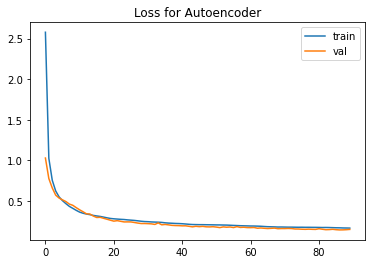

In [ ]:
history = autoencoder.fit(x=bert_embeddings128, y=bert_embeddings128, batch_size=64, epochs=90, verbose=0, validation_split=0.1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title('Loss for Autoencoder')
plt.show()

In [ ]:
history = autoencoder.fit(x=bert_embeddings128, y=bert_embeddings128, batch_size=64, epochs=90, verbose=1, validation_split=0.1)

Epoch 1/90
430/430 [==============================] - 1s 3ms/step - loss: 0.8709 - val_loss: 0.7184
Epoch 2/90
430/430 [==============================] - 1s 3ms/step - loss: 0.7780 - val_loss: 0.6460
Epoch 3/90
430/430 [==============================] - 1s 3ms/step - loss: 0.7090 - val_loss: 0.6029
Epoch 4/90
430/430 [==============================] - 1s 3ms/step - loss: 0.6636 - val_loss: 0.5825
Epoch 5/90
430/430 [==============================] - 1s 3ms/step - loss: 0.6313 - val_loss: 0.5515
Epoch 6/90
430/430 [==============================] - 1s 3ms/step - loss: 0.6051 - val_loss: 0.5117
Epoch 7/90
430/430 [==============================] - 1s 3ms/step - loss: 0.5766 - val_loss: 0.4912
Epoch 8/90
430/430 [==============================] - 1s 3ms/step - loss: 0.5568 - val_loss: 0.4757
Epoch 9/90
430/430 [==============================] - 1s 3ms/step - loss: 0.5424 - val_loss: 0.4531
Epoch 10/90
430/430 [==============================] - 1s 3ms/step - loss: 0.5313 - val_loss: 0.4467

KeyboardInterrupt: ignored

In [ ]:
mse(bert_embeddings128, decoder(encoder(bert_embeddings128)))

0.15966973

In [ ]:
encoder(bert_embeddings128).numpy().mean(axis=1).max()

4.1568203